# 🧠 Phase 1: Data Exploration – Credit Card Fraud Detection

In this notebook, we perform exploratory data analysis (EDA) on the Kaggle credit card fraud dataset. Our goals are to:
- Load and understand the structure of the dataset
- Investigate feature distributions (Amount, Time, Class)
- Confirm the degree of class imbalance
- Identify key differences between fraudulent and legitimate transactions
- Prepare data for modeling (e.g., scaling)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
%matplotlib inline
sns.set(style='whitegrid')

#### Load Dataset

In [20]:
df = pd.read_csv("../data/creditcard.csv")
# Preview structure
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
# Summary of dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
# Basic statistical summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Class Distribution (Target Variable)

In [24]:
# Count of classes
class_counts = df['Class'].value_counts()
print(class_counts)

# Percentage
print("Class Distribution (%):")
print(class_counts / len(df) * 100)

Class
0    284315
1       492
Name: count, dtype: int64
Class Distribution (%):
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


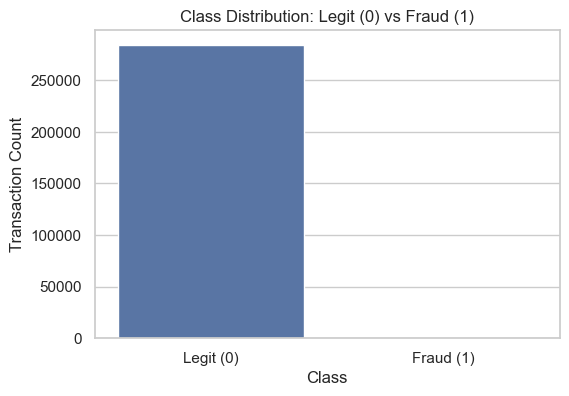

In [25]:
# Plot the imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Legit (0) vs Fraud (1)')
plt.xlabel('Class')
plt.ylabel('Transaction Count')
plt.xticks([0,1], ['Legit (0)', 'Fraud (1)'])
plt.show()

#### Explore Time and Amount

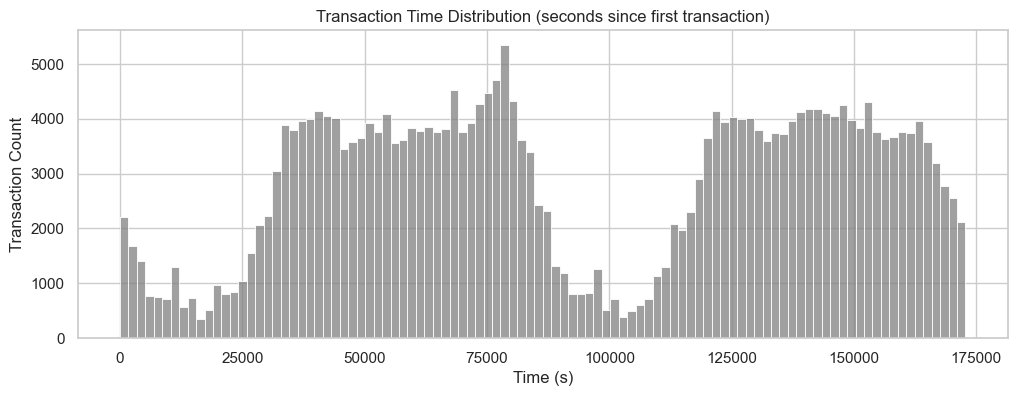

In [26]:
# Plot distribution of Time
plt.figure(figsize=(12,4))
sns.histplot(df['Time'], bins=100, kde=False, color='gray')
plt.title("Transaction Time Distribution (seconds since first transaction)")
plt.xlabel("Time (s)")
plt.ylabel("Transaction Count")
plt.show()

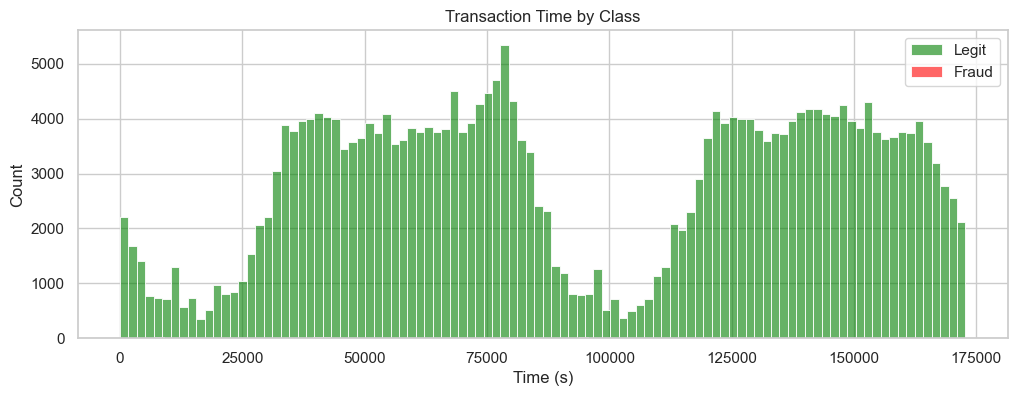

In [27]:
# Compare Time distribution for fraud vs legit
plt.figure(figsize=(12,4))
sns.histplot(df[df['Class'] == 0]['Time'], bins=100, color='green', label='Legit', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.title("Transaction Time by Class")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

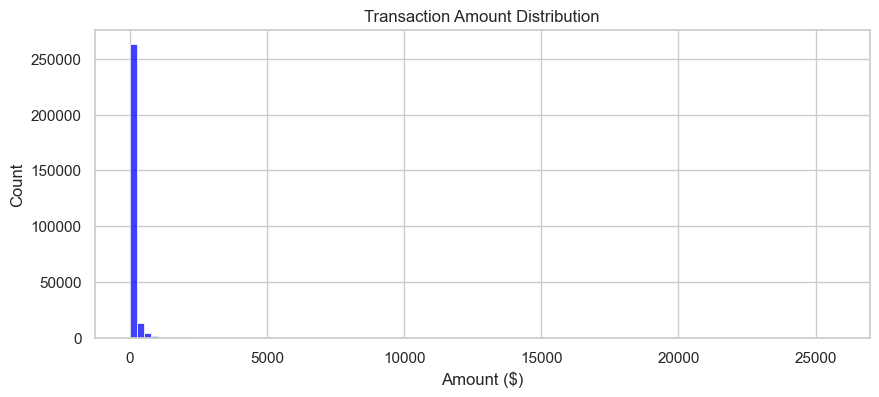

In [28]:
# Distribution of Amount
plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=100, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.show()

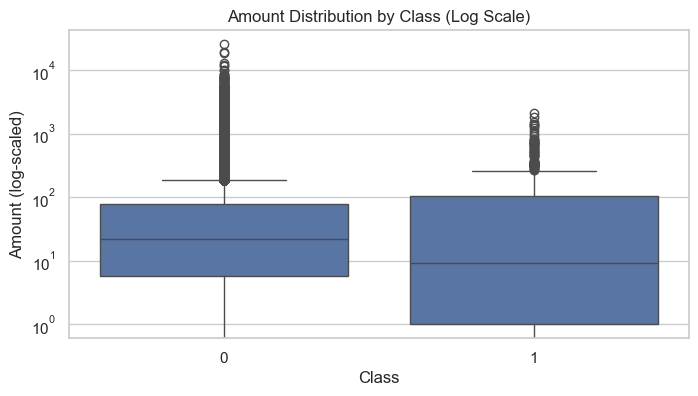

In [29]:
# Boxplot by class
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.title("Amount Distribution by Class (Log Scale)")
plt.xlabel("Class")
plt.ylabel("Amount (log-scaled)")
plt.show()

#### Mean Feature Comparison by Class

<Figure size 1200x600 with 0 Axes>

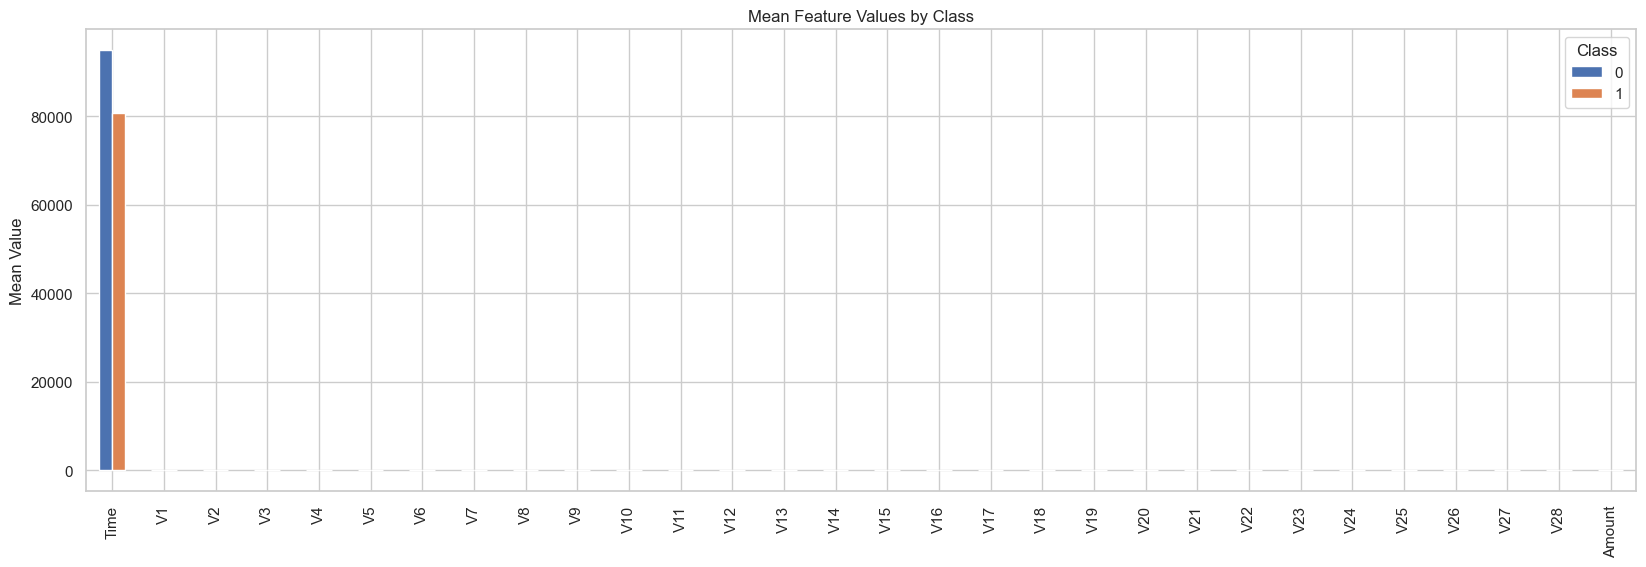

In [30]:
# Compare mean values of features across class
means = df.groupby('Class').mean().T

# Plot
plt.figure(figsize=(12,6))
means.plot(kind='bar', figsize=(20,6))
plt.title("Mean Feature Values by Class")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()

#### Feature Standardization
* Standardize Amount and Time for future use.

In [31]:
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df[['Amount']])
df['normTime'] = StandardScaler().fit_transform(df[['Time']])

# Drop original versions
df.drop(['Amount', 'Time'], axis=1, inplace=True)

#### Final Dataset Snapshot

In [32]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [33]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,...,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,0.001727,-3.672378e-17,-5.109395e-17
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


In [34]:
df.to_csv("../data/processed_creditcard.csv", index=False)

#### ✅ Key Takeaways from EDA

- The dataset is highly imbalanced: only 0.17% of transactions are fraudulent.
- No missing values; data is clean and ready for modeling.
- `Amount` and `Time` have been standardized for unsupervised learning.
- Fraudulent transactions show different time and amount distributions.
- PCA features (`V1` to `V28`) do not require further preprocessing at this stage.

Next step: Build an Isolation Forest anomaly detection model.

In [37]:
# Set plot theme
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Class Distribution
df['Class'].value_counts().plot(kind='bar', title='Transaction Class Distribution')
plt.xticks(ticks=[0, 1], labels=['Legit', 'Fraud'], rotation=0)
plt.ylabel('Count')
plt.savefig("../assets/class_distribution.png")
plt.clf()

# 2. Amount Distribution by Class
sns.histplot(data=df, x='normAmount', bins=100, hue='Class', log_scale=(False, True))
plt.title('Transaction Amount Distribution by Class')
plt.savefig("../assets/amount_distribution_by_class.png")
plt.clf()

# 3. Time Distribution by Class
sns.histplot(data=df, x='normTime', bins=100, hue='Class', element='step')
plt.title('Transaction Time Distribution by Class')
plt.savefig("../assets/time_distribution_by_class.png")
plt.clf()

# 4. Correlation Heatmap
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.6})
plt.title('Correlation Matrix (PCA Features + Labels)')
plt.savefig("../assets/correlation_matrix.png")
plt.clf()

# 5. Boxplots of V1–V5
for col in ['V1', 'V2', 'V3', 'V4', 'V5']:
    sns.boxplot(data=df, x='Class', y=col)
    plt.title(f'Boxplot of {col} by Class')
    plt.savefig(f"../assets/boxplot_{col}_by_class.png")
    plt.clf()

# 6. Violin Plot for V14
sns.violinplot(data=df, x='Class', y='V14')
plt.title('Violin Plot of V14 by Class')
plt.savefig("../assets/violinplot_V14.png")
plt.clf()

# 7. KDE Plot of V14
df[df['Class'] == 0]['V14'].plot(kind='kde', label='Legit')
df[df['Class'] == 1]['V14'].plot(kind='kde', label='Fraud')
plt.title('Density Plot of V14 (Fraud vs Legit)')
plt.xlabel('V14 Value')
plt.legend()
plt.savefig("../assets/kde_V14_fraud_vs_legit.png")
plt.clf()

print("✅ All EDA plots saved to /assets")

✅ All EDA plots saved to /assets


<Figure size 1000x600 with 0 Axes>